<h2> Imports </h2>

In [1]:
#import libraries
import matplotlib.pyplot as plt
import awkward as ak
import pandas as pd
import numpy as np
import uproot
from hist import Hist, axis

import sys
import os

# Add parent directory to sys.path
sys.path.append(os.path.abspath('/home/phenoprojects/MC_Samples/CODIGO_ANALISIS_VBF_DM/Analysis'))

import files_functions 
import plot_functions
import calculation_functions


/home/phenoprojects/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


<h2> Find Data Files </h2>

In [2]:
#Setup dictionaries.

signal_folder = "../signal_folder/"
signal_files = {     #times 1000 to convert from pb to fb
            "DMsimpl_spin0_Y0gg1_DeltaEta2.root": 1.64749 * 1000,
            
            }

background_dir = "../background_data/"
background_folders = {#"BKG_Wjets_WToLNu" : 47744.85 * 1000,
                       "Wlnu_jets": 61082.51494 * 1000,
                       "Znunu_jets": 12995.62137 * 1000}  



binning = {
    "PT": {"range": (20, 1000), "bins": 14},  # (300 - 20) / 20 = 14 bins
    "Eta*Eta": {"range": (-25, 25), "bins": 500},  # (25 - (-25)) / 0.1 = 500 bins
    "Delta_Eta": {"range": (0, 10), "bins": 100},  # (10 - 0) / 0.1 = 100 bins
    "Transverse": {"range": (0, 500), "bins": 100},  # (2000 - 500) / 20 = 75 bins
    "Eta": {"range": (-5, 5), "bins": 100},  # (5 - (-5)) / 0.1 = 100 bins
    "Phi": {"range": (-(np.pi), np.pi), "bins": 63},  
    "Invariant": {"range": (50, 3000), "bins": 148}  # (3000 - 50) / 20 = 147.5, rounded to 148 bins
}

<h2> Retrieve and Store Weights </h2>

In [3]:
signal_weights = files_functions.get_signal_weights()
background_weights_W, background_weights_Z = files_functions.get_background_weights()

background_weightsWZ = [background_weights_W, background_weights_Z]

<h1>  - - PLOTTING - - </h1>

<h2> Initial Plots without any Cuts </h2>

In [22]:
import importlib

importlib.reload(plot_functions)

<module 'plot_functions' from '/home/phenoprojects/MC_Samples/CODIGO_ANALISIS_VBF_DM/Analysis/plot_functions.py'>

<h3> Plot MET </h3>

In [23]:
plot_functions.PlotMET(None,signal_weights,background_weightsWZ,"A1_PlotMet_noCuts")

KeyboardInterrupt: 

<h3> Plot PhiMet </h3>


(494246.99999999645, 1978671546866.8733)

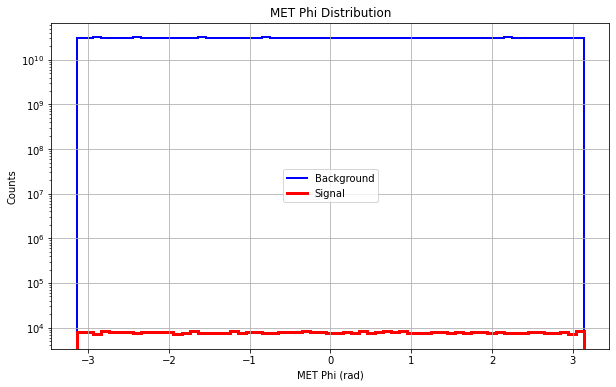

In [ ]:
plot_functions.PlotPhiMet(None,signal_weights,background_weightsWZ,"A1_PlotPhiMet_noCuts")


<h3> Plot PTJ0,J1 </h3>

(981564.6570601574, 994882942004.4453)

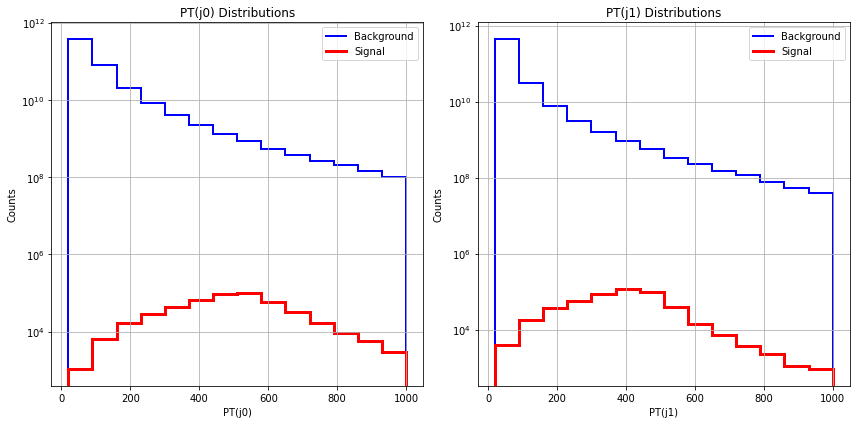

In [51]:
plot_functions.PlotJets("PT","PT",None,signal_weights,background_weightsWZ,"A1_PlotPTJets_noCuts")

<h3> Plot PhiJ0,J1</h3>

(988493.9999999929, 995368667031.5269)

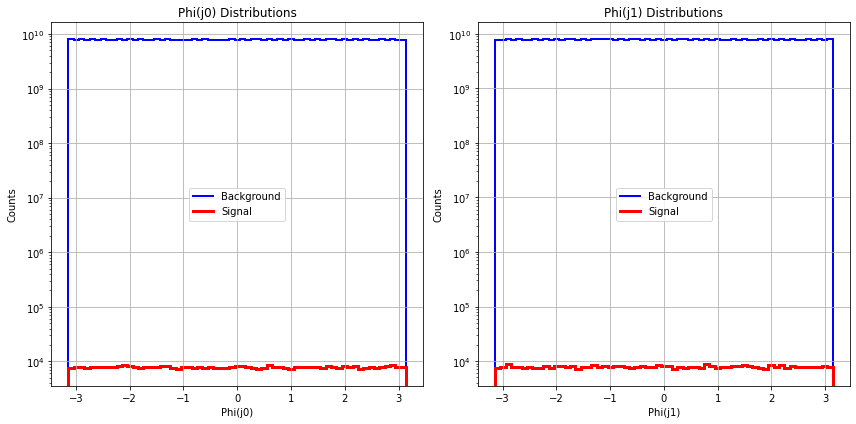

In [ ]:
plot_functions.PlotJets("Phi","Phi",None,signal_weights,background_weightsWZ,"A1_PlotPhiJets_noCuts")

<h3> Plot EtaJ0,J1 </h3>

In [15]:
plot_functions.PlotJets("Eta","Eta",None,signal_weights,background_weightsWZ,"A1_PlotEtaJets_noCuts")

KeyboardInterrupt: 

<h3> Plot Eta(j0)*Eta(j1)</h3>

(Hist(Regular(500, -25, 25, name='Eta*Eta'), storage=Double()) # Sum: 494247.0000000055,
 Hist(Regular(500, -25, 25, name='Eta*Eta'), storage=Double()) # Sum: 497684333515.84393)

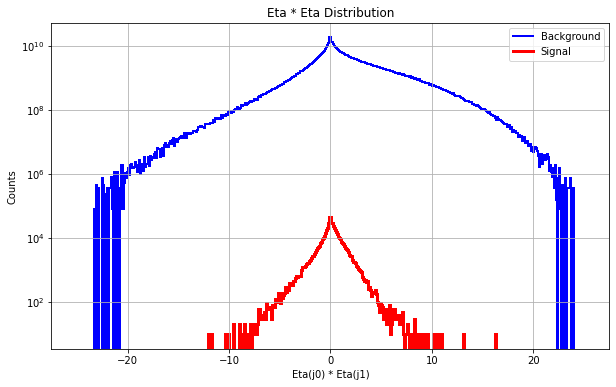

In [16]:
plot_functions.PlotEtaEta(None,signal_weights,background_weightsWZ,"A1_PlotEtaEtaJets_noCuts")


<h3> Plot DeltaEta</h3>

(Hist(Regular(100, 0, 10, name='DeltaEta'), storage=Double()) # Sum: 494246.9999999962,
 Hist(Regular(100, 0, 10, name='DeltaEta'), storage=Double()) # Sum: 497684333516.19354)

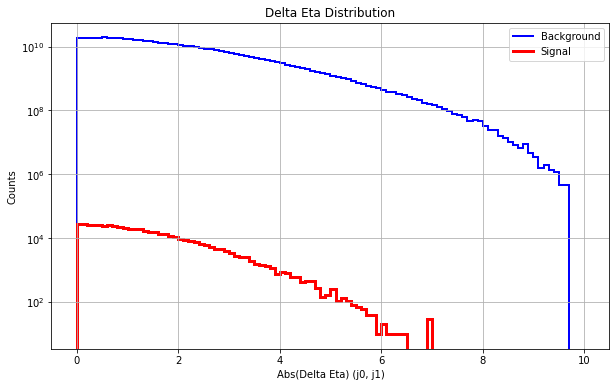

In [19]:
plot_functions.PlotDeltaJets(None,signal_weights,background_weightsWZ,"A1_PlotDeltaEtaJets_noCuts")

<h3> Plot InvariantMass </h3>

Plotting Invariant Mass


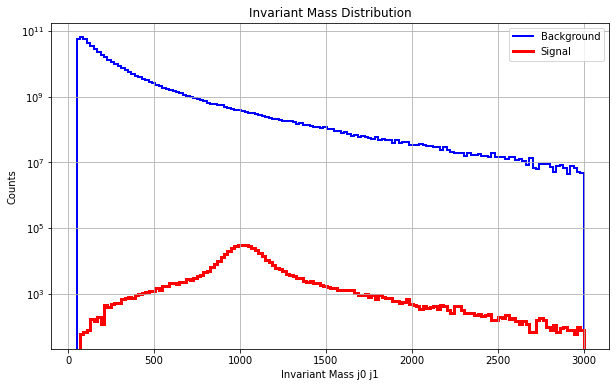

In [4]:
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents = plot_functions.PlotInvariantMass(None,signal_weights,background_weightsWZ,"A1_PlotInvMass_noCuts")


In [8]:
print("num bkg events:", currBkgEvents)
print("num z events:", numZBkgEvents)
print("num w events:", numWBkgEvents)

num bkg events: 457177983628.3033
num z events: 46754918810.181885
num w events: 410423064818.4533


<h1> Before Any Cuts </h1>

In [9]:
cuts_strings = []
Signal_numevents = []
Background_numevents = []
BkgW_numevents = []
BkgZ_numevents = []
significances = []

num_cuts = 0
maskList = []

In [10]:
#Add current statistics to cut chart
Signal_numevents.append(currSigEvents)  
Background_numevents.append(currBkgEvents)
BkgW_numevents.append(numWBkgEvents)
BkgZ_numevents.append(numZBkgEvents)

currSignificance = calculation_functions.calculateSignificance(numSig=currSigEvents, numBkg=currBkgEvents)
significances.append(currSignificance)
cuts_strings.append("no cuts")

<h2> Cut 1 </h2>

<h3> Eta(j0)*Eta(j1) < 0</h3>

In [11]:
#Cut for eta(j0)*eta(j1) >=0
def mask_etaeta_condition(df):
    # Extract Eta for j0 and j1
    eta_j0 = df["Jet.Eta"].apply(lambda x: x[0] if len(x) > 1 else None)
    eta_j1 = df["Jet.Eta"].apply(lambda x: x[1] if len(x) > 1 else None)

    # Create mask where Eta(j0) * Eta(j1) < 0
    return (eta_j0 * eta_j1) < 0

maskList.append(mask_etaeta_condition)
cuts_strings.append("Eta(j0) * Eta(j1) < 0")

Plotting Invariant Mass


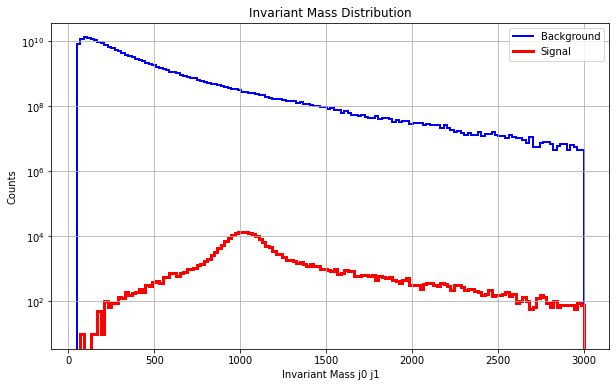

In [13]:
# Plot and store necessary calculations
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents = plot_functions.PlotInvariantMass(maskList,signal_weights,background_weightsWZ,"A1_PlotInvMass_1Cut")
currSignificance = calculation_functions.calculateSignificance(currSigEvents, currBkgEvents)

Signal_numevents.append(currSigEvents)
Background_numevents.append(currBkgEvents)
BkgW_numevents.append(numWBkgEvents)
BkgZ_numevents.append(numZBkgEvents)
significances.append(currSignificance)


In [14]:
print("Current Sig Events: ", Signal_numevents)
print("Current Bkg Events: ", Background_numevents)
print("Current W Bkg Events: ", BkgW_numevents)
print("Current Z Bkg Events: ", BkgZ_numevents)
print("Current Significances: ", significances)

Current Sig Events:  [492210.70235999674, 227976.3712199988]
Current Bkg Events:  [457177983628.3033, 172960683825.29642]
Current W Bkg Events:  [410423064818.4533, 152302714139.3344]
Current Z Bkg Events:  [46754918810.181885, 20657969685.962986]
Current Significances:  [np.float64(0.727961086995872), np.float64(0.5481707441105712)]


<h2> Cut 2 </h2>

<h3> Pt(j0) > 30</h3>

In [15]:
## We choose PT(j0)>30
def mask_pt_j0_condition(df):
    # Extract PT for j0
    pt_j0 = df["Jet.PT"].apply(lambda x: x[0] if len(x) > 1 else None)

    # Create mask where PT(j0) > 30
    return pt_j0 > 30

maskList.append(mask_pt_j0_condition)
cuts_strings.append("Pt(j0) > 30")


Plotting Invariant Mass


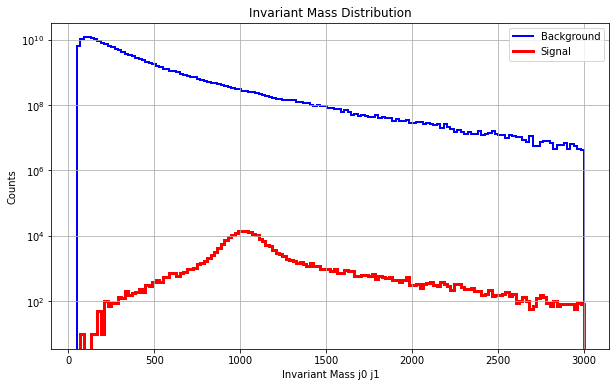

In [16]:
# Plot and store necessary calculations
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents = plot_functions.PlotInvariantMass(maskList,signal_weights,background_weightsWZ,"A1_PlotInvMass_2Cut")
currSignificance = calculation_functions.calculateSignificance(currSigEvents, currBkgEvents)

Signal_numevents.append(currSigEvents)
Background_numevents.append(currBkgEvents)
BkgW_numevents.append(numWBkgEvents)
BkgZ_numevents.append(numZBkgEvents)
significances.append(currSignificance)

In [17]:
print("Current Sig Events: ", Signal_numevents)
print("Current Bkg Events: ", Background_numevents)
print("Current Significances: ", significances)


Current Sig Events:  [492210.70235999674, 227976.3712199988, 227976.3712199988]
Current Bkg Events:  [457177983628.3033, 172960683825.29642, 160602029769.5419]
Current Significances:  [np.float64(0.727961086995872), np.float64(0.5481707441105712), np.float64(0.5688712863588216)]


<h2> Cut 3 </h2>

<h3> Pt(j1) > 30</h3>

In [18]:
## We choose PT(j0)>30
def mask_pt_j1_condition(df):
    # Extract PT for j0
    pt_j1 = df["Jet.PT"].apply(lambda x: x[1] if len(x) > 1 else None)

    # Create mask where PT(j1) > 30
    return pt_j1 > 30

maskList.append(mask_pt_j1_condition)
cuts_strings.append("Pt(j1) > 30")


Plotting Invariant Mass


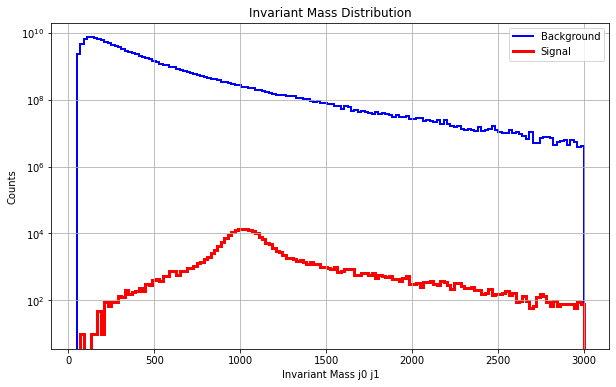

In [19]:
# Plot and store necessary calculations
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents = plot_functions.PlotInvariantMass(maskList,signal_weights,background_weightsWZ,"A1_PlotInvMass_3Cut")
currSignificance = calculation_functions.calculateSignificance(currSigEvents, currBkgEvents)

Signal_numevents.append(currSigEvents)
Background_numevents.append(currBkgEvents)
BkgW_numevents.append(numWBkgEvents)
BkgZ_numevents.append(numZBkgEvents)
significances.append(currSignificance)

In [20]:
print("Current Sig Events: ", Signal_numevents)
print("Current Bkg Events: ", Background_numevents)
print("Current W Bkg Events: ", BkgW_numevents)
print("Current Z Bkg Events: ", BkgZ_numevents)
print("Current Significances: ", significances)

Current Sig Events:  [492210.70235999674, 227976.3712199988, 227976.3712199988, 227956.6013399988]
Current Bkg Events:  [457177983628.3033, 172960683825.29642, 160602029769.5419, 114117270371.64503]
Current W Bkg Events:  [410423064818.4533, 152302714139.3344, 141618779818.28876, 101293243186.21678]
Current Z Bkg Events:  [46754918810.181885, 20657969685.962986, 18983249951.254112, 12824027185.42913]
Current Significances:  [np.float64(0.727961086995872), np.float64(0.5481707441105712), np.float64(0.5688712863588216), np.float64(0.6748015198606472)]


<h2> Cut 4 </h2>

<h3> Pt(j1) > 30</h3>

In [21]:
# TODO unsure is this mask will work, will have to stest

## We choose MET > 50
def mask_Met_condition(df):
    # Extract MET
    met = df["MissingET.MET"]

    # Create mask where MET > 50
    return met > 50

maskList.append(mask_Met_condition)
cuts_strings.append("MET > 50")

Plotting Invariant Mass


/home/phenoprojects/.local/lib/python3.10/site-packages/awkward_pandas/array.py:120: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(ak.is_none(self._data))
/home/phenoprojects/.local/lib/python3.10/site-packages/awkward_pandas/array.py:120: DeprecationWarning: __array__ implementation doesn't accept a copy keyword, so passing copy=False failed. __array__ must implement 'dtype' and 'copy' keyword arguments. To learn more, see the migration guide https://numpy.org/devdocs/numpy_2_0_migration_guide.html#adapting-to-changes-in-the-copy-keyword
  return np.array(ak.is_none(self._data))
/home/phenoprojects/.local/lib/python3.10/site-packages/awkward_pandas/array.py:120: DeprecationWarning: __array__ implementation doesn'

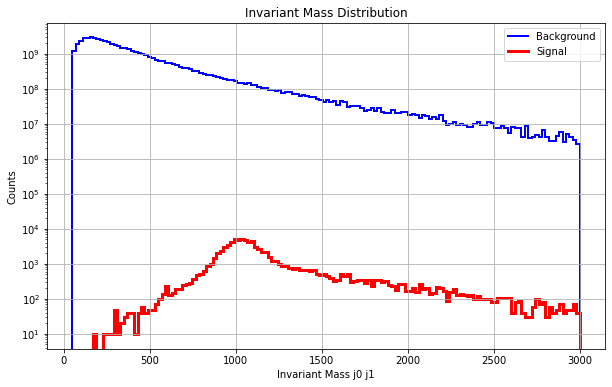

In [22]:
# Plot and store necessary calculations
currSigEvents, currBkgEvents, numWBkgEvents, numZBkgEvents = plot_functions.PlotInvariantMass(maskList,signal_weights,background_weightsWZ,"A1_PlotInvMass_4Cut")
currSignificance = calculation_functions.calculateSignificance(currSigEvents, currBkgEvents)

Signal_numevents.append(currSigEvents)
Background_numevents.append(currBkgEvents)
BkgW_numevents.append(numWBkgEvents)
BkgZ_numevents.append(numZBkgEvents)
significances.append(currSignificance)

<h1> Final Table </h1>

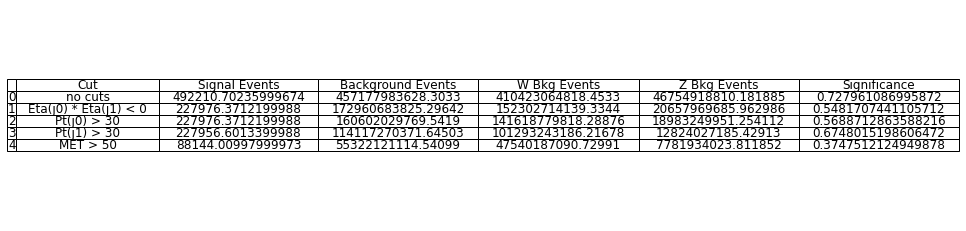

In [24]:

plot_functions.Get_Table(Signal_numevents,Background_numevents,BkgW_numevents,BkgZ_numevents,significances, cuts_strings)